# Introduction
**This is my introduction to Kaggle's Datasets using Machine Learning**

I will be building and continually testing/optimizing models to predict the Iowa housing prices.
The specific models I will be using are: 
Decision Trees
Random Forest
Gradient Boosted Forests


# Code



In [1]:
import pandas as pd
# read in files 
main_file_path = './train.csv'
data = pd.read_csv(main_file_path)

In [2]:
# look at the data
print(data.describe())
print(data.columns)
print(data.SalePrice.head())
print(data[['LotArea','YearBuilt','Condition1']].describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [3]:
# label targets and indicators
y = data.SalePrice
#arbitrarily chosen indicators -- will change in time
X = data[['LotArea','YearBuilt','1stFlrSF', '2ndFlrSF', 'FullBath','BedroomAbvGr','TotRmsAbvGrd']]
X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


In [4]:
# Try first: Decision trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split # required to be able to split the data

tree_model = DecisionTreeRegressor()
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state = 0)
tree_model.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [5]:
# test how effective it is
from sklearn.metrics import mean_absolute_error # required to get mean-squared error

predictions = tree_model.predict(val_X)
mean_absolute_error(val_y,predictions)
#33038.54 ...

32583.068493150684

In [6]:
# Optimizing parameters
# this function calculates the max tree nodes in some model -- we're testing the number of nodes
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0) # specifying the number of nodes
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)
# testing for varying number of nodes
for max_leaf_nodes in [5, 25, 50, 100, 150, 500]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    # it looks like 50 works the best

Max leaf nodes: 5  		 Mean Absolute Error:  35190
Max leaf nodes: 25  		 Mean Absolute Error:  28501
Max leaf nodes: 50  		 Mean Absolute Error:  27825
Max leaf nodes: 100  		 Mean Absolute Error:  28653
Max leaf nodes: 150  		 Mean Absolute Error:  29679
Max leaf nodes: 500  		 Mean Absolute Error:  32662


In [7]:
# Testing with Random Forest
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(train_X,train_y)
for_pred = forest_model.predict(val_X)
mean_absolute_error(val_y,for_pred)
#24228.964...

23673.141506849315

In [8]:
# repetition with NULL value columns as well
# testing different kinds of method
from sklearn.preprocessing import Imputer

def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

#print(data.isnull().sum())
num_pred = data.drop(['SalePrice'], axis = 1).select_dtypes(exclude=['object'])


#  1. Drop values
missing_cols = [col for col in train_X.columns if train_X[col].isnull().any()]
redX_train = train_X.drop(missing_cols, axis = 1)
redX_val = val_X.drop(missing_cols, axis = 1)
print(score_dataset(redX_train,redX_val,train_y,val_y))
#24559.1318

# 2. Imputer
imputer = Imputer()
impX_train = imputer.fit_transform(train_X)
impX_test = imputer.transform(val_X)
print(score_dataset(impX_train,impX_test,train_y,val_y))
#24089.974

# 3. Imputer + Extension
for col in missing_cols:
    impeX_train[col + '_was_missing'] = impeX_train[col].isnull()
    impeX_test[col+ '_was_missing'] = impeX_test[col].isnull()
    
impeX_train = imputer.fit_transform(train_X)
impeX_test = imputer.transform(val_X)
print(score_dataset(impeX_train,impeX_test,train_y,val_y))
#23819.76
#they all do about the same in this dataset

23565.047305936074
22434.697534246578
24123.55159817351


In [9]:
# one-hot encoding 
# ohpred = pd.get_dummies(train_predictors) , where train_predictors is a set of predictors
# -1*cross_val_score(RandomForestRegressor(50), ohpred, y, scoring = "neg_mean_absolute_error).mean()

In [10]:
# Testing with XGBoost -- Gradient Boosted Decision Trees
# care X has been renamed
X2 = data.drop('SalePrice',axis=1).select_dtypes(exclude='object')
X_train,X_test,y_train,y_test = train_test_split(X2.as_matrix(), y.as_matrix(), test_size = 0.25)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

from xgboost import XGBRegressor
xgb_model = XGBRegressor(silent = True)
xgb_model.fit(X_train,y_train,verbose = False)
xgbpred = xgb_model.predict(X_test)
print("Default: %d\t",mean_absolute_error(xgbpred,y_test))
# 16263.669


model = XGBRegressor(n_estimators = 300, learning_rate = 0.05, silent = True)
model.fit(X_train,y_train, early_stopping_rounds = 5, eval_set=[(X_test,y_test)],verbose = False)
preds = model.predict(X_test)
print("With 10 early stopping value, we get mae = %f \t\t" %(mean_absolute_error(preds,y_test)))
# It doesn't seem like tuning parameters does too much in this case

ModuleNotFoundError: No module named 'xgboost'

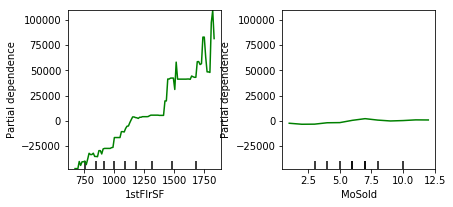

In [14]:
# Working on partial dependence plots
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

#data.columns
#MoSold, GarageYrBlt,1stFlrSF look interesting
cols = ['1stFlrSF','GarageYrBlt','MoSold']
partX = data[cols]
impartX = imputer.fit_transform(partX)
GBModel = GradientBoostingRegressor()
GBModel.fit(impartX,y)
plots = plot_partial_dependence(GBModel,features=[0,2], X=impartX, feature_names=cols,grid_resolution = 100)
# surprising results: I expected prices to change based off months

In [12]:
# pipeline version of code and implement cross-validation
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(Imputer(),RandomForestRegressor())
pipeline.fit(train_X, train_y)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, val_X, val_y,scoring = "neg_mean_absolute_error")
print(scores)
print("\t%f" %(-1*scores.mean()))

[-24908.01311475 -27166.17295082 -33779.6       ]
	28617.928689


In [13]:
# Completion of data track!
print("Hurray! We're done!")

Hurray! We're done!
